In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

see [A Tutorial on Principal Component Analysis](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf) for an intuitive in depth despcription of PCA and SVD

## intuition

we have the following 2D data, and would like to find a projection onto 1D so that the maximum amount of variance is kept.

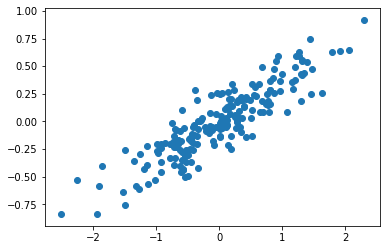

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

# center data on 0,0
X=X-np.mean(X, axis=0)

plt.scatter(X[:,0], X[:,1])

remember that the projection of one vector $\vec{x}$ onto another one $|vec{v}$ (see [here](https://matthew-brett.github.io/teaching/vector_projection.html)) is given by:

$$c = \frac{\vec{v}\times \vec{x}}{||\vec{v}||^2}$$


$$proj_\vec{v} \vec{x} = \vec{v} c$$


where $c$ is the length of the projection of $\vec{x}$ over $\vec{v}$

### we inspect a few projections

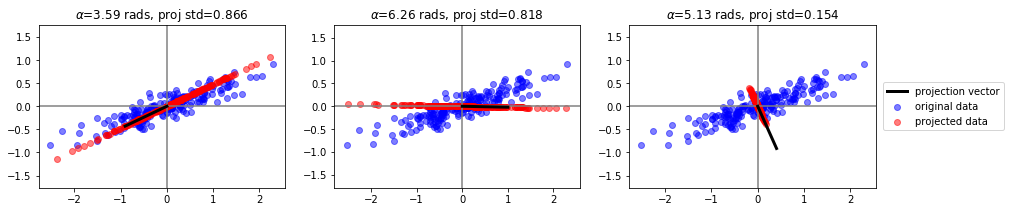

In [3]:
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="projected data")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="projection vector")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

### let's find the projection with least std by frute force

Text(0, 0.5, 'projection std')

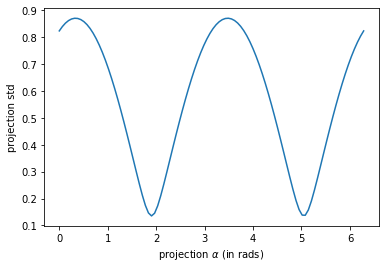

In [4]:
def get_maxmin_projections(X):
    stds = []
    angles = np.linspace(0,np.pi*2, 100)
    for a in angles:
        v = np.array([np.cos(a), np.sin(a)])
        c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
        stds.append(np.std(c))
    v2 = unit_vector(angles[np.argmin(stds)])
    v1 = unit_vector(angles[np.argmax(stds)])
    
    return angles, stds, v1, v2
angles, stds, v1, v2 = get_maxmin_projections(X)

plt.plot(angles, stds)
plt.xlabel("projection $\\alpha$ (in rads)")
plt.ylabel("projection std")

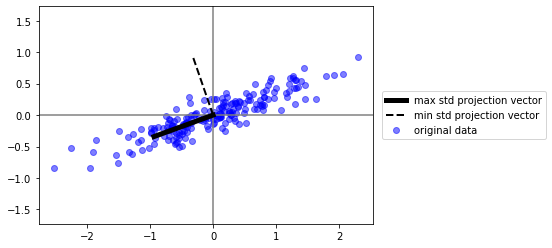

In [5]:
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.axvline(0, color="gray")
plt.axhline(0, color="gray")
plt.plot([0,v1[0]], [0,v1[1]], color="black", lw=5, label="max std projection vector")
plt.plot([0,v2[0]], [0,v2[1]], color="black", ls="--", lw=2, label="min std projection vector")
plt.axis('equal')
plt.ylim(-2,2)
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

**these are the principal components**!! **obvserve that their dimensionality is the same as the original data**

this is what PCA gives us

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(X)
print ("sklearn PCA components")
print (pca.components_)
print ("brute force components")
print (v1)
print (v2)

sklearn PCA components
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
brute force components
[-0.93969262 -0.34202014]
[-0.32706796  0.94500082]


but of course much more efficiently, through linear algebra

In [11]:
%timeit pca.fit(X)

305 µs ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit get_maxmin_projections(X)

6.64 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### we can use the largest component to reduce our data from 2D to 1D

observe that:

$$\mathbf{X_t} = \mathbf{X} \times \mathbf{V}$$

where:
- $\mathbf{X}$ is our data
- $\mathbf{V}$ is the vector of selected components
- $\mathbf{X_t}$ is the transformed data

so we are restricting ourselves to **linear transformations** (rotations and scaling)

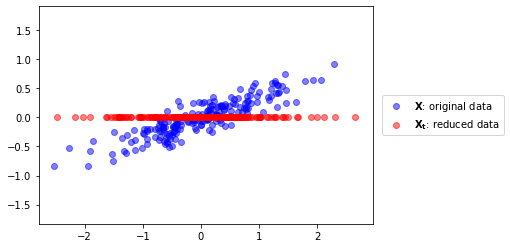

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
Xt = pca.transform(X)[:,0]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: original data")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: reduced data")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

and we can also reconstruct 2D data after the transformation

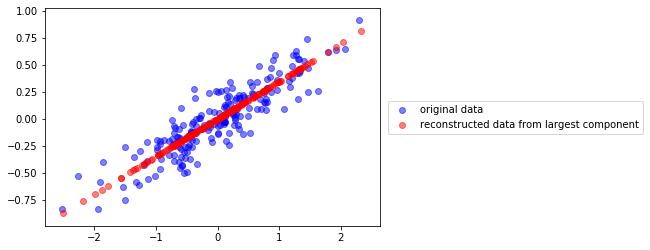

In [14]:
v0 = pca.components_[0]
c = X.dot(v0)
Xr = np.r_[[i*v0 for i in c]]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="reconstructed data from largest component")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
pca.components_


array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [16]:
U,s,V = np.linalg.svd(X)

In [17]:
V

array([[ 0.94446029,  0.32862557],
       [ 0.32862557, -0.94446029]])